<a href="https://colab.research.google.com/github/Altobert/laboratorioTIC-1/blob/main/Copia_de_Laboratorio1_Asm_Alondra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Presentación 1 acerca de la calidad del Agua

**Integrantes:**

* Alondra Villaseca Barrera
* Alberto San Martín Concha

#Inidicaciones importantes acerca de las variables que describen la calidad del agua.

1. aluminium - dangerous if greater than 2.8
2. ammonia - dangerous if greater than 32.5
3. arsenic - dangerous if greater than 0.01
5. barium - dangerous if greater than 2
6. cadmium - dangerous if greater than 0.005
7. chloramine - dangerous if greater than 4
8. chromium - dangerous if greater than 0.1
9. copper - dangerous if greater than 1.3
10. flouride - dangerous if greater than 1.5
11. bacteria - dangerous if greater than 0
12. viruses - dangerous if greater than 0
13. lead - dangerous if greater than 0.015
14. nitrates - dangerous if greater than 10
15. nitrites - dangerous if greater than 1
16. mercury - dangerous if greater than 0.002
17. perchlorate - dangerous if greater than 56
18. radium - dangerous if greater than 5
19. selenium - dangerous if greater than 0.5
20. silver - dangerous if greater than 0.1
21. uranium - dangerous if greater than 0.3
22. is_safe - class attribute {0 - not safe, 1 - safe}




##Se carga la libreria google.colab.para poder montar el dataset en nuestro entorno de trabajo.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Se importan librerias a utilizar

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Es montado Dataset waterQuality1.csv desde carpeta GoogleDrive
##Se muestran las primeras 5 lineas o head del dataset

In [ ]:
#import pandas as pd
#df = pd.read_csv('/content/drive/MyDrive/tic1 lab/waterQuality1_sin_num.csv')
df = pd.read_csv('/content/drive/MyDrive/Minor-DataScience/water-quality/waterQuality1.csv')
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [ ]:
pip install probscale

#Ocurrió problemática con valores "#NUM!" generando dificultad para poder evaluar todo como tipo de dato float. Se procedio a varias estrategias para que finalmente se elimino la fila completa.

In [ ]:

# Encontrar el valor en la posición 7551 (index 7550 en Python) de la columna 'columna1'
index_to_remove = 7550  # Índice basado en 0 (7551 - 1)

if index_to_remove < len(df):
    value_to_remove = df.at[index_to_remove, 'is_safe']

    # Verificar si el valor a eliminar es '#NUM!'
    if value_to_remove == '#NUM!':
        # Eliminar el valor en la posición 7551 de la columna 'columna1'
        df.at[index_to_remove, 'is_safe'] = None  # Reemplazar con NaN (valor nulo)
        # También puedes eliminar toda la fila si lo deseas:
        # df = df.drop(index_to_remove)

        print(f"Valor '#NUM!' encontrado en la posición {index_to_remove + 1} de la columna 'is_safe' y eliminado.")
    else:
        print(f"El valor en la posición {index_to_remove + 1} de la columna 'is_safe' no es '#NUM!', no se eliminó.")

# Mostrar el DataFrame después de la eliminación
print("\nDataFrame después de la eliminación:")
print(df)


#print(df.iloc[7550, 1])

El valor en la posición 7551 de la columna 'is_safe' no es '#NUM!', no se eliminó.

DataFrame después de la eliminación:
      aluminium  ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          1.65     9.08     0.04    2.85    0.007        0.35      0.83   
1          2.32    21.16     0.01    3.31    0.002        5.28      0.68   
2          1.01    14.02     0.04    0.58    0.008        4.24      0.53   
3          1.36    11.33     0.04    2.96    0.001        7.23      0.03   
4          0.92    24.33     0.03    0.20    0.006        2.67      0.69   
...         ...      ...      ...     ...      ...         ...       ...   
7991       0.05     7.78     0.00    1.95    0.040        0.10      0.03   
7992       0.05    24.22     0.02    0.59    0.010        0.45      0.02   
7993       0.09     6.85     0.00    0.61    0.030        0.05      0.05   
7994       0.01    10.00     0.01    2.00    0.000        2.00      0.00   
7995       0.04     6.85     0.01    0.70  

In [ ]:
#df = df.drop(7550)

KeyError: '[7550] not found in axis'

In [ ]:
print(df.iloc[7550, 1])

0.13


# Una vez eliminado desde dataset, ahora se muestra la variable ammonia como float64.

In [ ]:
print(df.dtypes["ammonia"])

float64


In [ ]:
##Tamaño del data set: 7996 filas y 21 variables.
df.shape



(7996, 21)

In [ ]:
df.info()
##Tip 👀: Vizualización gráfica del target
##Etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7996 entries, 0 to 7995
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

#Pasar amonia a one-hot-encoder.
##Pasar is_safe a one-hot-encoder.
##Primer filtro

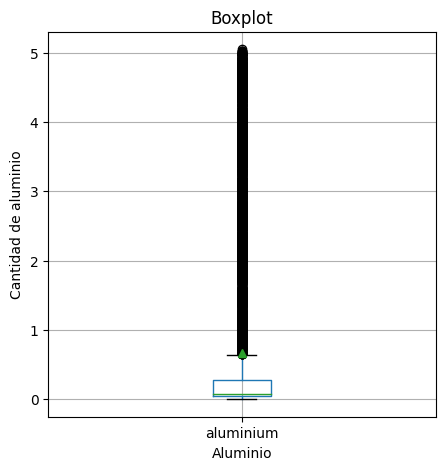

<Figure size 640x480 with 0 Axes>

In [ ]:
df.boxplot(column='aluminium', figsize=(5,5), showmeans = True)
plt.ylabel("Cantidad de aluminio")
plt.xlabel("Aluminio")
plt.title("Boxplot")
plt.show()
plt.savefig('boxplot.png')

##El bigote inferior de este gráfico se encuentra cerca del cero, por lo que indica que el nivel del aluminio es adecuado que sea menor que 2.8

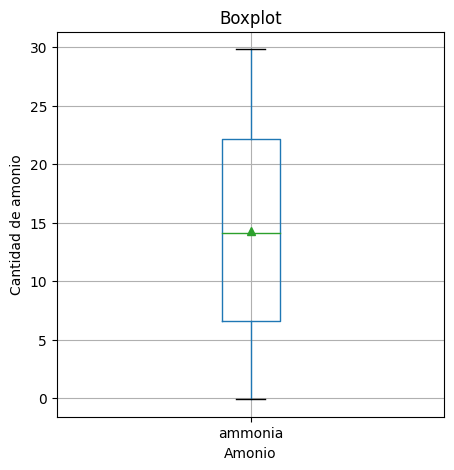

<Figure size 640x480 with 0 Axes>

In [ ]:
df.boxplot(column='ammonia', figsize=(5,5), showmeans = True)
plt.ylabel("Cantidad de amonio")
plt.xlabel("Amonio")
plt.title("Boxplot")
plt.show()
plt.savefig('boxplot.png')

# El grafico anterior muestra la cantidad de amonio en el agua y se encuentra en su media, casi 15, por lo cual se encuentra bien, menor que 32.5

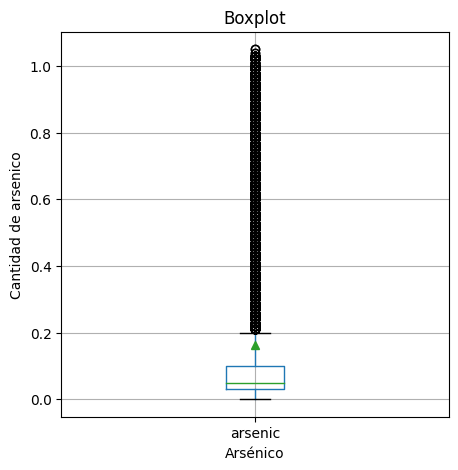

<Figure size 640x480 with 0 Axes>

In [ ]:
df.boxplot(column='arsenic', figsize=(5,5), showmeans = True)
#plt.yscale('log')
plt.ylabel("Cantidad de arsenico")
plt.xlabel("Arsénico")
plt.title("Boxplot")
plt.show()
plt.savefig('boxplot.png')

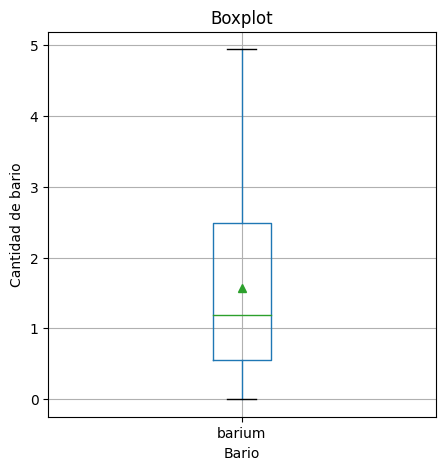

<Figure size 640x480 with 0 Axes>

In [ ]:
df.boxplot(column='barium', figsize=(5,5), showmeans = True)
#plt.yscale('log')
plt.ylabel("Cantidad de bario")
plt.xlabel("Bario")
plt.title("Boxplot")
plt.show()
plt.savefig('boxplot.png')

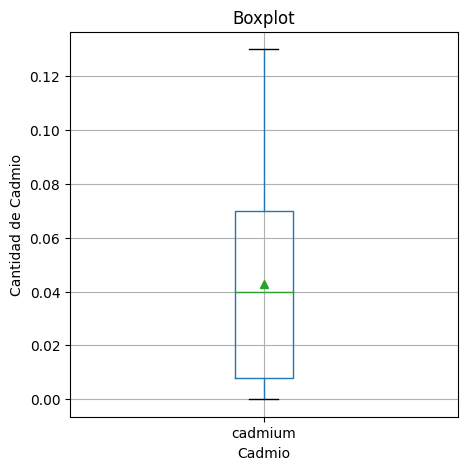

<Figure size 640x480 with 0 Axes>

In [ ]:
df.boxplot(column='cadmium', figsize=(5,5), showmeans = True)
#plt.yscale('log')
plt.ylabel("Cantidad de Cadmio")
plt.xlabel("Cadmio")
plt.title("Boxplot")
plt.show()
plt.savefig('boxplot.png')

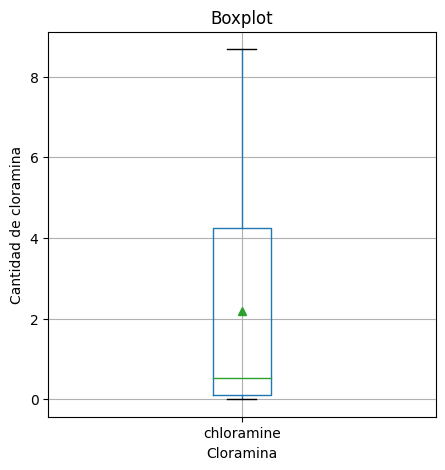

<Figure size 640x480 with 0 Axes>

In [ ]:
df.boxplot(column='chloramine', figsize=(5,5), showmeans = True)
#plt.yscale('log')
plt.ylabel("Cantidad de cloramina")
plt.xlabel("Cloramina")
plt.title("Boxplot")
plt.show()
plt.savefig('boxplot.png')

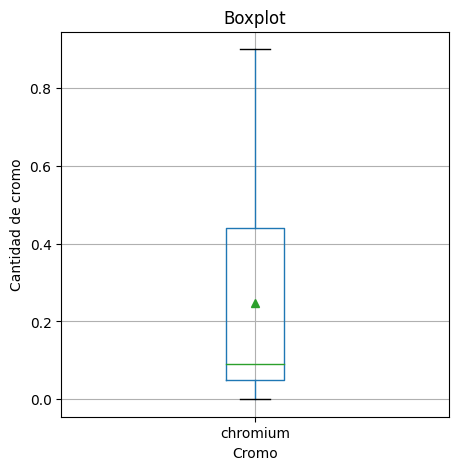

<Figure size 640x480 with 0 Axes>

In [ ]:
df.boxplot(column='chromium', figsize=(5,5), showmeans = True)
#plt.yscale('log')
plt.ylabel("Cantidad de cromo")
plt.xlabel("Cromo")
plt.title("Boxplot")
plt.show()
plt.savefig('boxplot.png')

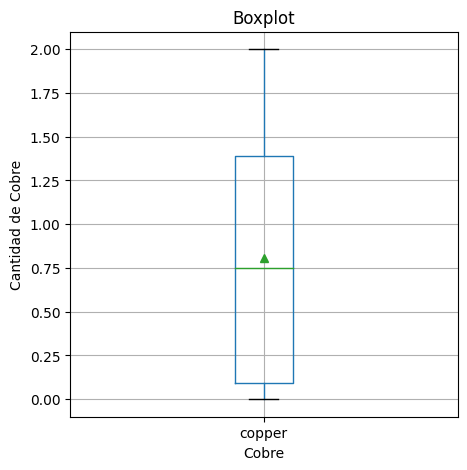

<Figure size 640x480 with 0 Axes>

In [ ]:
df.boxplot(column='copper', figsize=(5,5), showmeans = True)
#plt.yscale('log')
plt.ylabel("Cantidad de Cobre")
plt.xlabel("Cobre")
plt.title("Boxplot")
plt.show()
plt.savefig('boxplot.png')

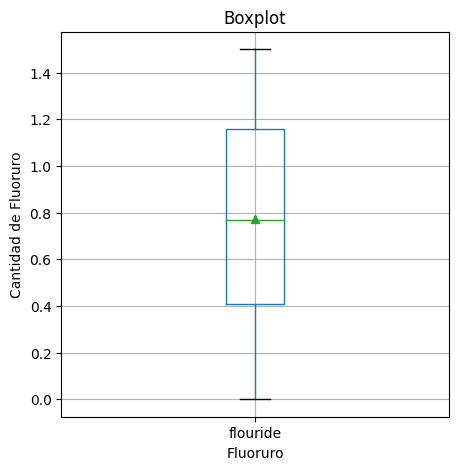

<Figure size 640x480 with 0 Axes>

In [ ]:
df.boxplot(column='flouride', figsize=(5,5), showmeans = True)
#plt.yscale('log')
plt.ylabel("Cantidad de Fluoruro")
plt.xlabel("Fluoruro")
plt.title("Boxplot")
plt.show()
plt.savefig('boxplot.png')

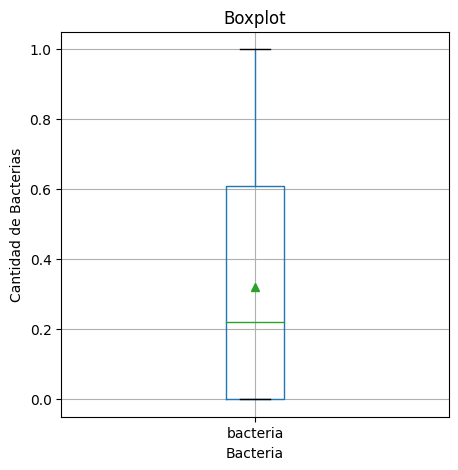

<Figure size 640x480 with 0 Axes>

In [ ]:
df.boxplot(column='bacteria', figsize=(5,5), showmeans = True)
#plt.yscale('log')
plt.ylabel("Cantidad de Bacterias")
plt.xlabel("Bacteria")
plt.title("Boxplot")
plt.show()
plt.savefig('boxplot.png')

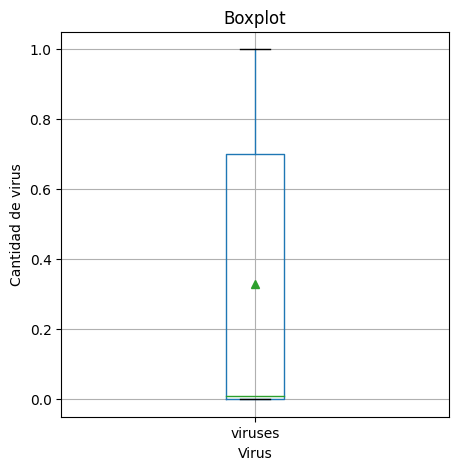

<Figure size 640x480 with 0 Axes>

In [ ]:
df.boxplot(column='viruses', figsize=(5,5), showmeans = True)
#plt.yscale('log')
plt.ylabel("Cantidad de virus")
plt.xlabel("Virus")
plt.title("Boxplot")
plt.show()
plt.savefig('boxplot.png')

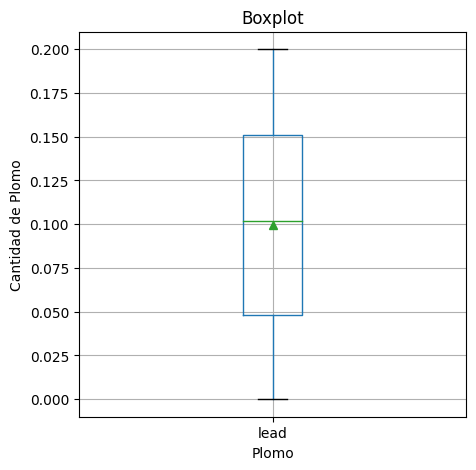

<Figure size 640x480 with 0 Axes>

In [ ]:
df.boxplot(column='lead', figsize=(5,5), showmeans = True)
#plt.yscale('log')
plt.ylabel("Cantidad de Plomo")
plt.xlabel("Plomo")
plt.title("Boxplot")
plt.show()
plt.savefig('boxplot_pb.png')

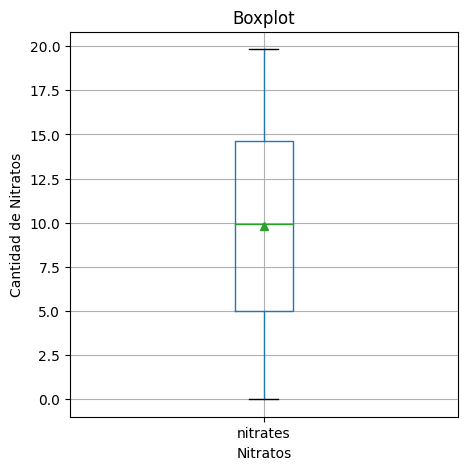

<Figure size 640x480 with 0 Axes>

In [ ]:
df.boxplot(column='nitrates', figsize=(5,5), showmeans = True)
#plt.yscale('log')
plt.ylabel("Cantidad de Nitratos")
plt.xlabel("Nitratos")
plt.title("Boxplot")
plt.show()
plt.savefig('boxplot.png')

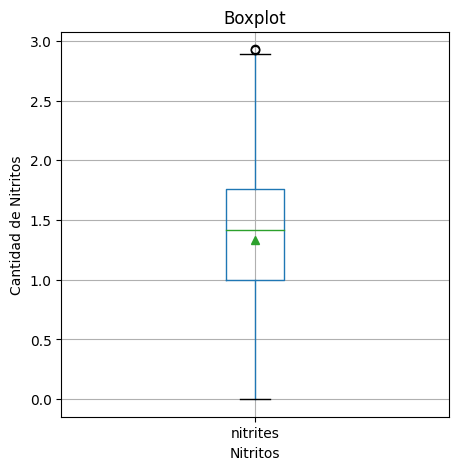

<Figure size 640x480 with 0 Axes>

In [ ]:
df.boxplot(column='nitrites', figsize=(5,5), showmeans = True)
#plt.yscale('log')
plt.ylabel("Cantidad de Nitritos")
plt.xlabel("Nitritos")
plt.title("Boxplot")
plt.show()
plt.savefig('boxplot.png')

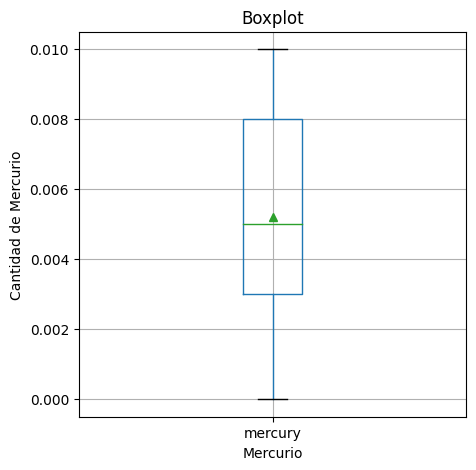

<Figure size 640x480 with 0 Axes>

In [ ]:
df.boxplot(column='mercury', figsize=(5,5), showmeans = True)
#plt.yscale('log')
plt.ylabel("Cantidad de Mercurio")
plt.xlabel("Mercurio")
plt.title("Boxplot")
plt.show()
plt.savefig('boxplot.png')

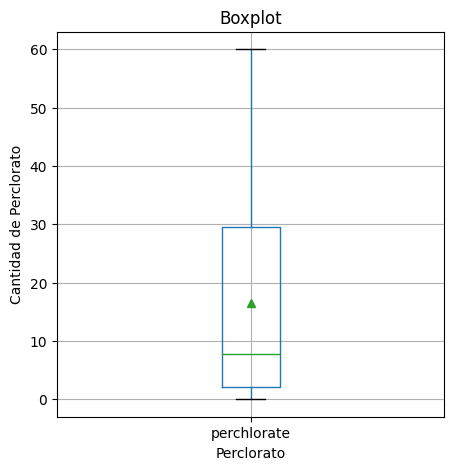

<Figure size 640x480 with 0 Axes>

In [ ]:
df.boxplot(column='perchlorate', figsize=(5,5), showmeans = True)
#plt.yscale('log')
plt.ylabel("Cantidad de Perclorato")
plt.xlabel("Perclorato")
plt.title("Boxplot")
plt.show()
plt.savefig('boxplot.png')

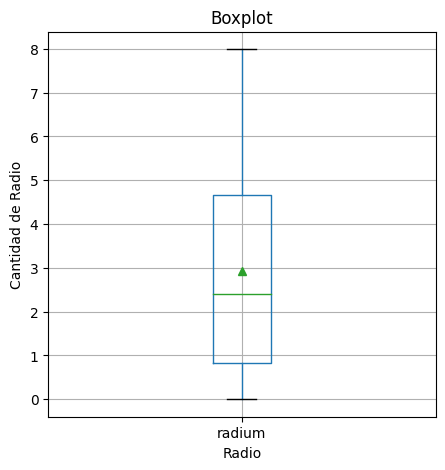

<Figure size 640x480 with 0 Axes>

In [ ]:
df.boxplot(column='radium', figsize=(5,5), showmeans = True)
#plt.yscale('log')
plt.ylabel("Cantidad de Radio")
plt.xlabel("Radio")
plt.title("Boxplot")
plt.show()
plt.savefig('boxplot.png')

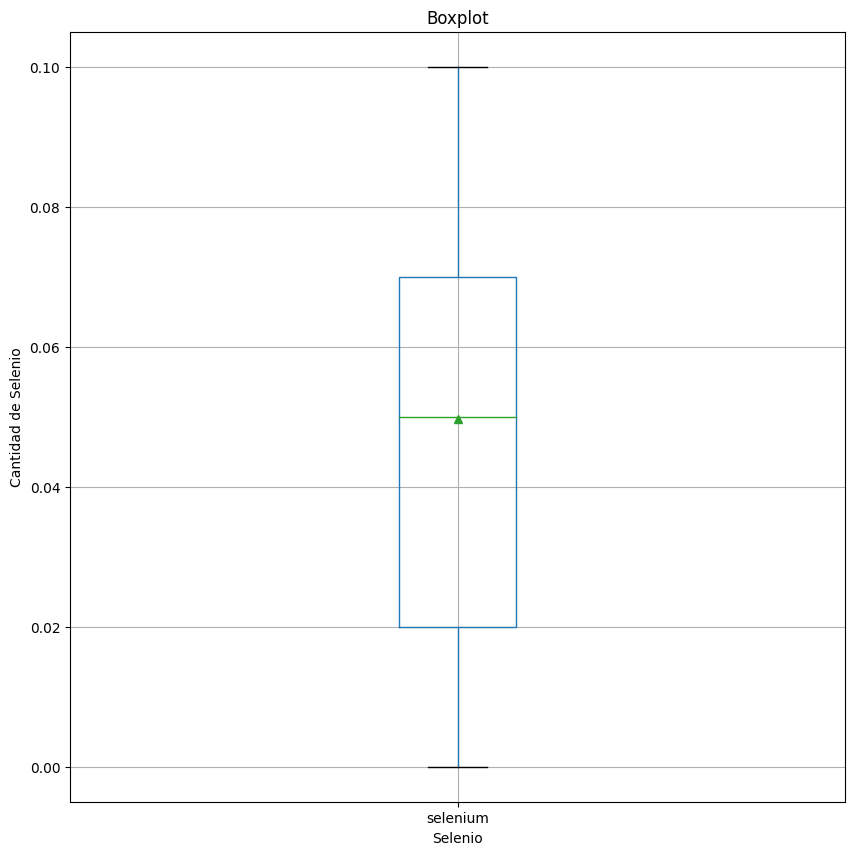

<Figure size 640x480 with 0 Axes>

In [ ]:
df.boxplot(column='selenium', figsize=(10,10), showmeans = True)
#plt.yscale('log')
plt.ylabel("Cantidad de Selenio")
plt.xlabel("Selenio")
plt.title("Boxplot")
plt.show()
plt.savefig('boxplot.png')

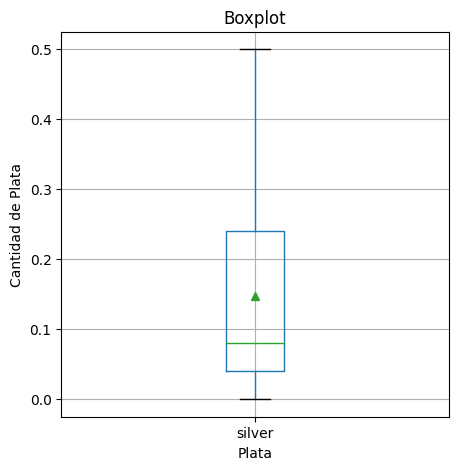

<Figure size 640x480 with 0 Axes>

In [ ]:
df.boxplot(column='silver', figsize=(5,5), showmeans = True)
#plt.yscale('log')
plt.ylabel("Cantidad de Plata")
plt.xlabel("Plata")
plt.title("Boxplot")
plt.show()
plt.savefig('boxplot.png')

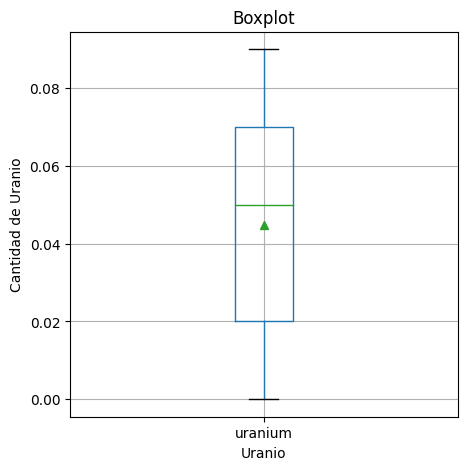

<Figure size 640x480 with 0 Axes>

In [ ]:
df.boxplot(column='uranium', figsize=(5,5), showmeans = True)
#plt.yscale('log')
plt.ylabel("Cantidad de Uranio")
plt.xlabel("Uranio")
plt.title("Boxplot")
plt.show()
plt.savefig('boxplot.png')

In [ ]:
df.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

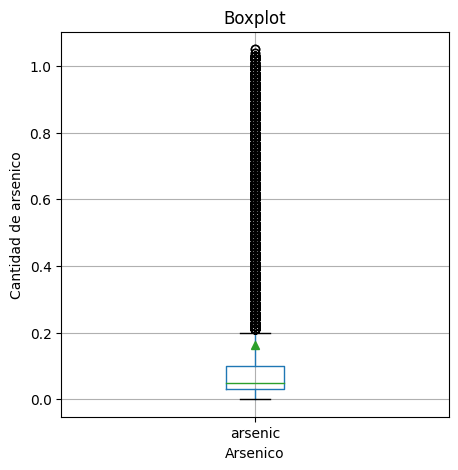

<Figure size 640x480 with 0 Axes>

In [ ]:
df.boxplot(column= 'arsenic', figsize=(5,5), showmeans = True)

plt.ylabel("Cantidad de arsenico")
plt.xlabel("Arsenico")
plt.title("Boxplot")

plt.show()
plt.savefig('boxplot.png')

In [ ]:
df.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,...,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.666396,14.278212,0.161477,1.567928,0.042803,2.177589,0.247300,0.805940,0.771646,0.319714,...,0.099431,9.819250,1.329846,0.005193,16.465266,2.920106,0.049684,0.147811,0.044672,0.114057
std,1.265323,8.878930,0.252632,1.216227,0.036049,2.567210,0.270663,0.653595,0.435423,0.329497,...,0.058169,5.541977,0.573271,0.002967,17.688827,2.322805,0.028773,0.143569,0.026906,0.317900
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.407500,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.745000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.132500,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


<Axes: >

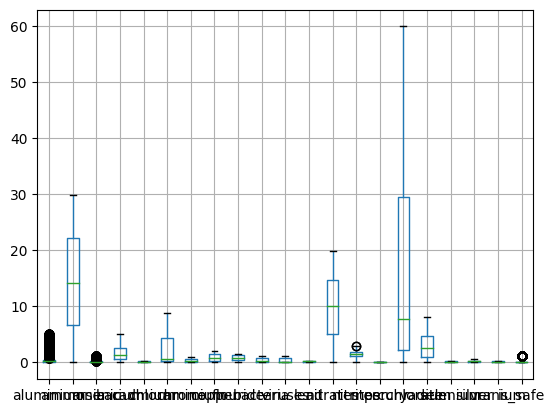

In [ ]:
df.boxplot()

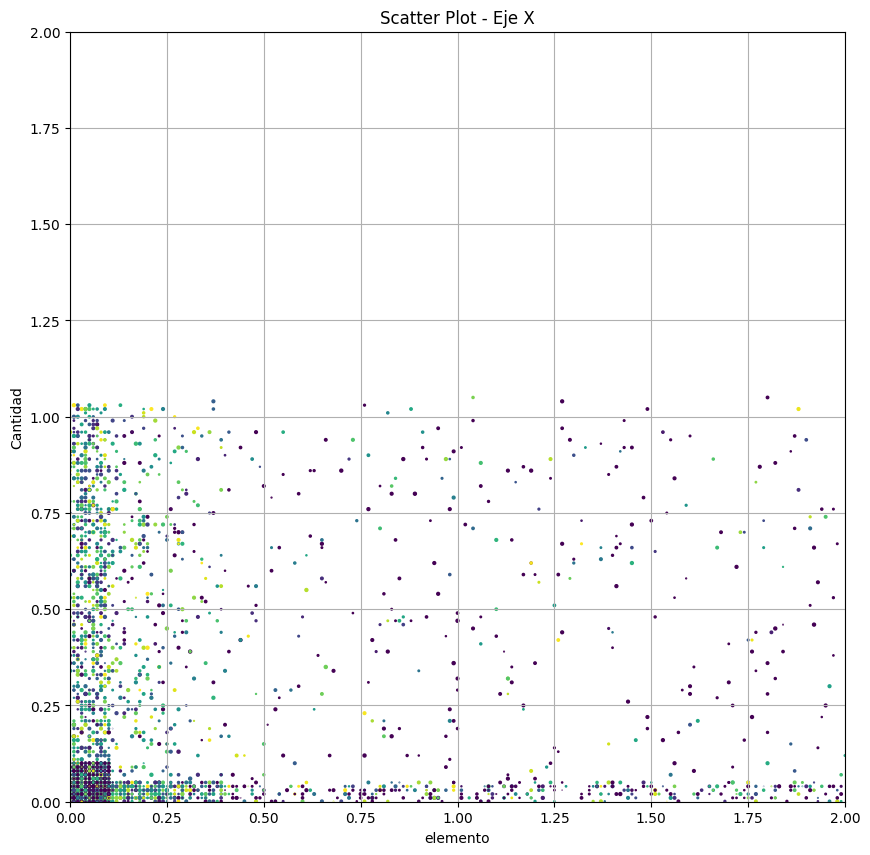

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,10))
ax1.set_xlabel('elemento')
ax1.scatter(df["aluminium"], df["arsenic"], df["barium"], df['bacteria'])
ax1.set_ylabel('Cantidad')
plt.ylim(0, 2)
plt.xlim(0, 2)
plt.grid()
plt.title("Scatter Plot - Eje X")
plt.show()

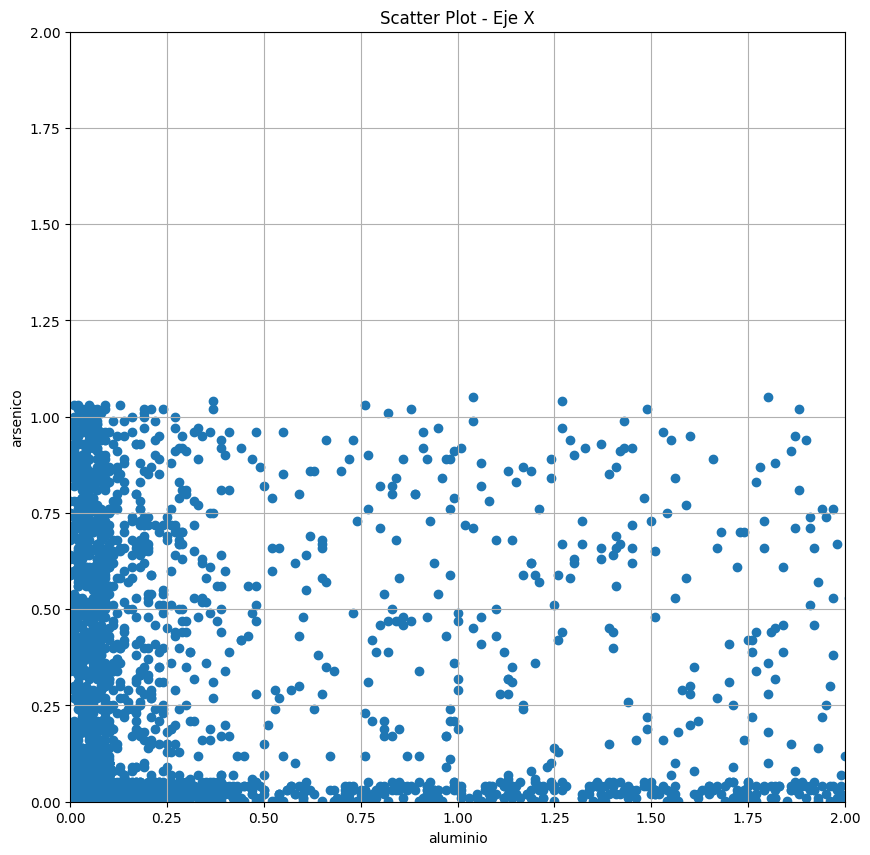

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,10))
ax1.set_xlabel('aluminio')
ax1.scatter(df["aluminium"], df["arsenic"])
ax1.set_ylabel('arsenico')
plt.ylim(0, 2)
plt.xlim(0, 2)
plt.grid()
plt.title("Scatter Plot - Eje X")
plt.show()

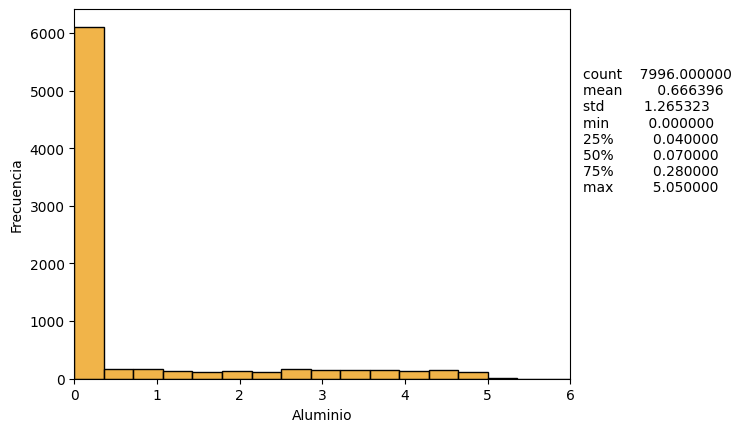

In [ ]:
import seaborn as sns

sns.histplot(data = df, x = "aluminium", color="#ed9b0c", bins = "sturges", binrange= (0, 10))
plt.xlim(0, 6)
plt.ylabel("Frecuencia")
plt.figtext(0.92,0.5, df["aluminium"].describe().to_string())
plt.xlabel("Aluminio")
plt.show()

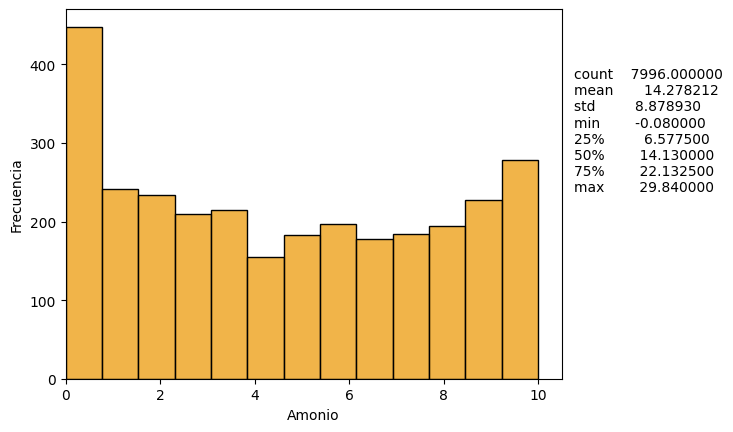

In [ ]:
import seaborn as sns

sns.histplot(data = df, x = "ammonia", color="#ed9b0c", bins = "sturges", binrange= (0, 10))
plt.xlim(0, )
plt.ylabel("Frecuencia")
plt.figtext(0.92,0.5, df["ammonia"].describe().to_string())
plt.xlabel("Amonio")
plt.show()

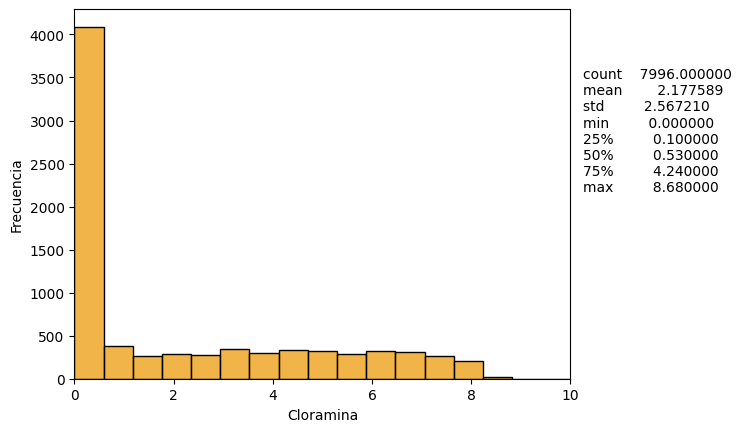

In [ ]:
import seaborn as sns

sns.histplot(data = df, x = "chloramine", color="#ed9b0c", bins = "sturges", binrange= (0, 10))
plt.xlim(0, 10)
plt.ylabel("Frecuencia")
plt.figtext(0.92,0.5, df["chloramine"].describe().to_string())
plt.xlabel("Cloramina")
plt.show()

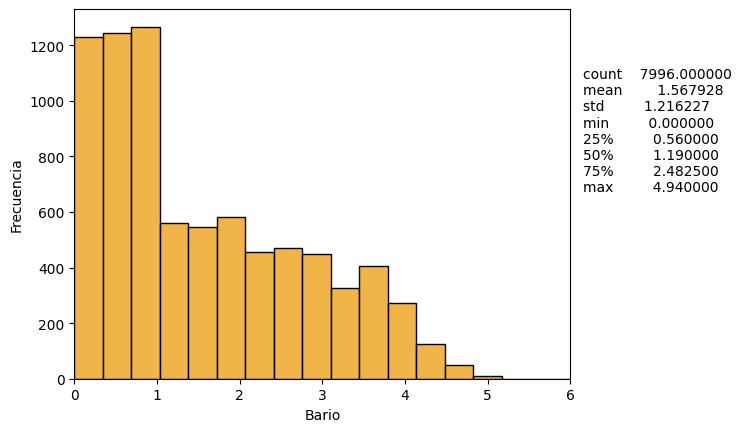

In [ ]:
import seaborn as sns

sns.histplot(data = df, x = "barium", color="#ed9b0c", bins = "sturges", binrange= (0, 10))
plt.xlim(0, 6)
plt.ylabel("Frecuencia")
plt.figtext(0.92,0.5, df["barium"].describe().to_string())
plt.xlabel("Bario")
plt.show()

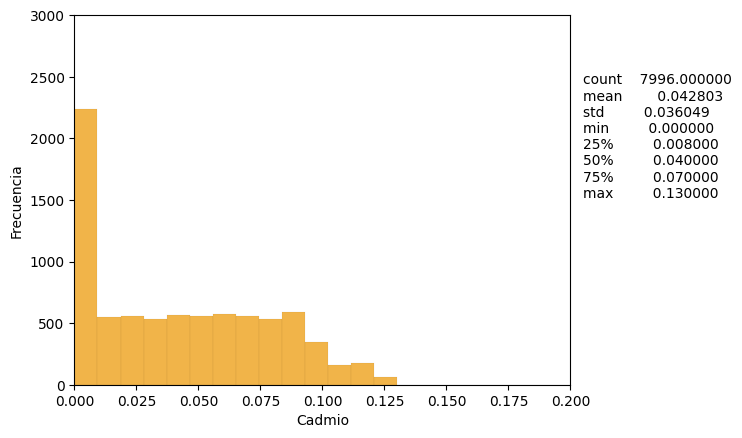

In [ ]:
import seaborn as sns

sns.histplot(data = df, x = "cadmium", color="#ed9b0c", bins = "sturges", binrange= (0, 10))
plt.xlim(0, 0.2)
plt.ylim(0, 3000)
plt.ylabel("Frecuencia")
plt.figtext(0.92,0.5, df["cadmium"].describe().to_string())
plt.xlabel("Cadmio")
plt.show()

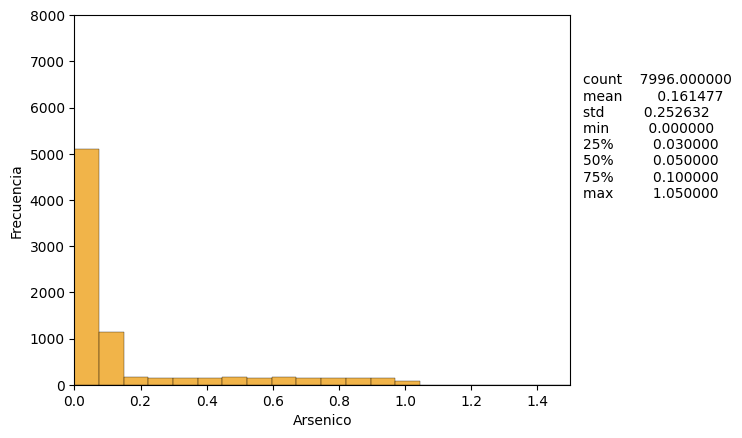

In [ ]:
import seaborn as sns

sns.histplot(data = df, x = "arsenic", color="#ed9b0c", bins = "sturges", binrange= (0, 10))
plt.xlim(0, 1.5)
plt.ylim(0, 8000)
plt.ylabel("Frecuencia")
plt.figtext(0.92,0.5, df["arsenic"].describe().to_string())
plt.xlabel("Arsenico")
plt.show()

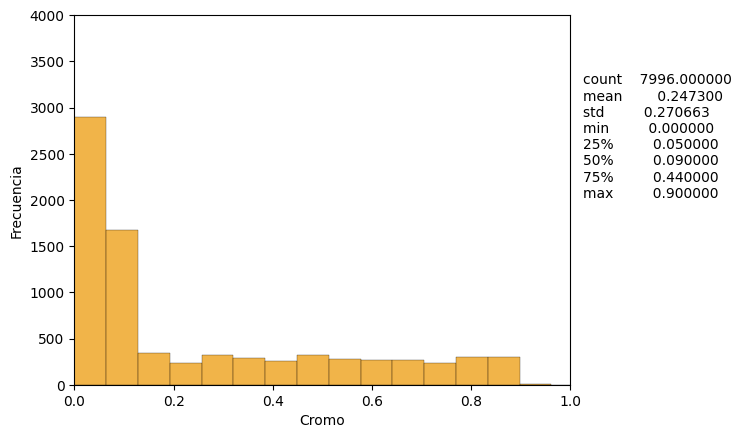

In [ ]:
import seaborn as sns

sns.histplot(data = df, x = "chromium", color="#ed9b0c", bins = "sturges", binrange= (0, 10))
plt.xlim(0, 1)
plt.ylim(0, 4000)
plt.ylabel("Frecuencia")
plt.figtext(0.92,0.5, df["chromium"].describe().to_string())
plt.xlabel("Cromo")
plt.show()

In [ ]:

#print(df.groupby(['cadmium']).describe())

        aluminium                                                       \
            count      mean       std   min   25%    50%     75%   max   
cadmium                                                                  
0.000       237.0  0.186962  0.651422  0.00  0.03  0.050  0.0800  4.73   
0.001       358.0  1.301201  1.572928  0.00  0.07  0.315  2.5250  4.98   
0.002       226.0  1.250398  1.512059  0.00  0.06  0.305  2.4450  4.96   
0.003       214.0  1.346262  1.634913  0.00  0.06  0.265  2.6825  4.98   
0.004       204.0  1.370196  1.625208  0.00  0.06  0.255  2.9250  4.94   
0.005       240.0  1.278875  1.570713  0.00  0.07  0.275  2.5575  5.00   
0.006       220.0  1.154591  1.423159  0.00  0.07  0.290  2.2250  4.80   
0.007       206.0  1.174466  1.573908  0.00  0.07  0.220  1.7700  4.98   
0.008       242.0  1.264091  1.574930  0.00  0.07  0.240  2.3900  4.93   
0.009        90.0  1.276778  1.407032  0.01  0.08  0.320  2.3025  4.59   
0.010       553.0  0.455226  1.084303 

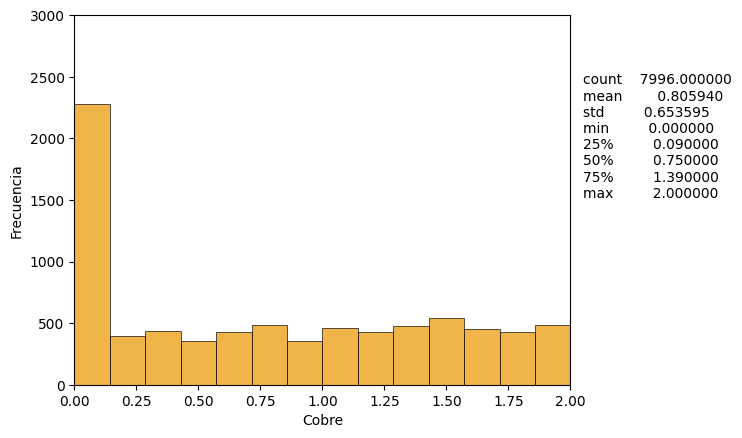

In [ ]:
import seaborn as sns

sns.histplot(data = df, x = "copper", color="#ed9b0c", bins = "sturges", binrange= (0, 10))
plt.xlim(0, 2)
plt.ylim(0, 3000)
plt.ylabel("Frecuencia")
plt.figtext(0.92,0.5, df["copper"].describe().to_string())
plt.xlabel("Cobre")
plt.show()

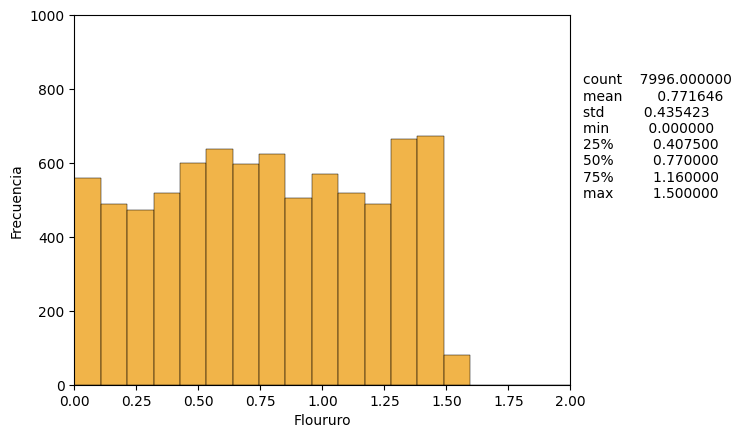

In [ ]:
sns.histplot(data = df, x = "flouride", color="#ed9b0c", bins = "sturges", binrange= (0, 10))
plt.xlim(0, 2)
plt.ylim(0, 1000)
plt.ylabel("Frecuencia")
plt.figtext(0.92,0.5, df["flouride"].describe().to_string())
plt.xlabel("Floururo")
plt.show()

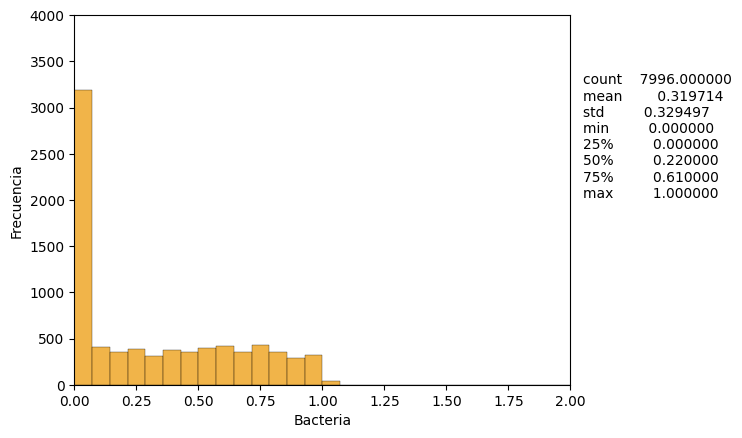

In [ ]:
sns.histplot(data = df, x = "bacteria", color="#ed9b0c", bins = "sturges", binrange= (0, 10))
plt.xlim(0, 2)
plt.ylim(0, 4000)
plt.ylabel("Frecuencia")
plt.figtext(0.92,0.5, df["bacteria"].describe().to_string())
plt.xlabel("Bacteria")
plt.show()

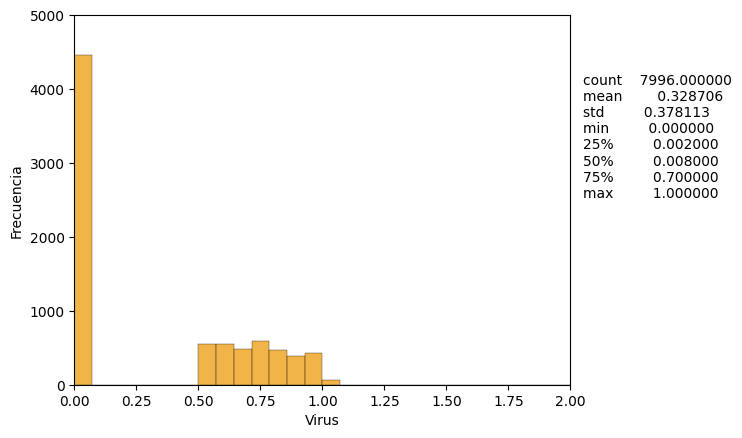

In [ ]:
sns.histplot(data = df, x = "viruses", color="#ed9b0c", bins = "sturges", binrange= (0, 10))
plt.xlim(0, 2)
plt.ylim(0, 5000)
plt.ylabel("Frecuencia")
plt.figtext(0.92,0.5, df["viruses"].describe().to_string())
plt.xlabel("Virus")
plt.show()

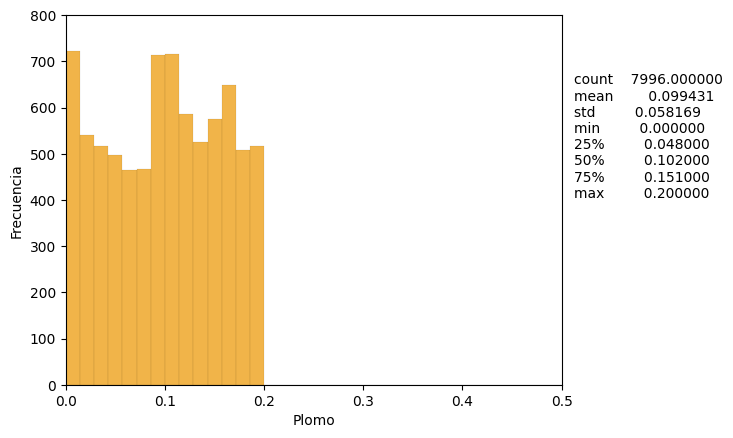

In [ ]:
sns.histplot(data = df, x = "lead", color="#ed9b0c", bins = "sturges", binrange= (0, 10))
plt.xlim(0, 0.5)
plt.ylim(0, 800)
plt.ylabel("Frecuencia")
plt.figtext(0.92,0.5, df["lead"].describe().to_string())
plt.xlabel("Plomo")
plt.show()

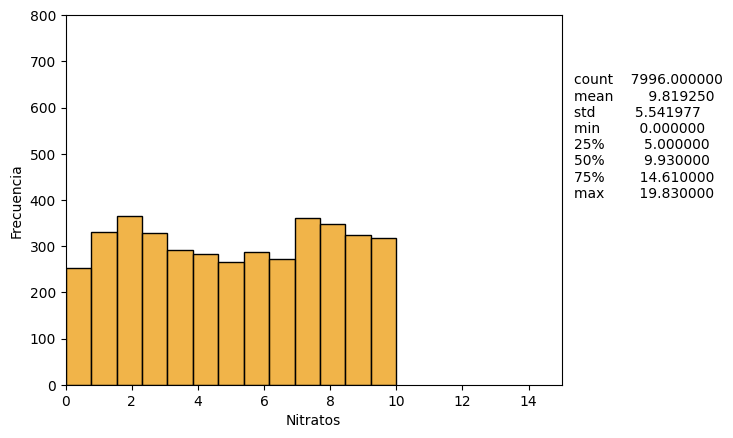

In [ ]:
sns.histplot(data = df, x = "nitrates", color="#ed9b0c", bins = "sturges", binrange= (0, 10))
plt.xlim(0, 15)
plt.ylim(0, 800)
plt.ylabel("Frecuencia")
plt.figtext(0.92,0.5, df["nitrates"].describe().to_string())
plt.xlabel("Nitratos")
plt.show()

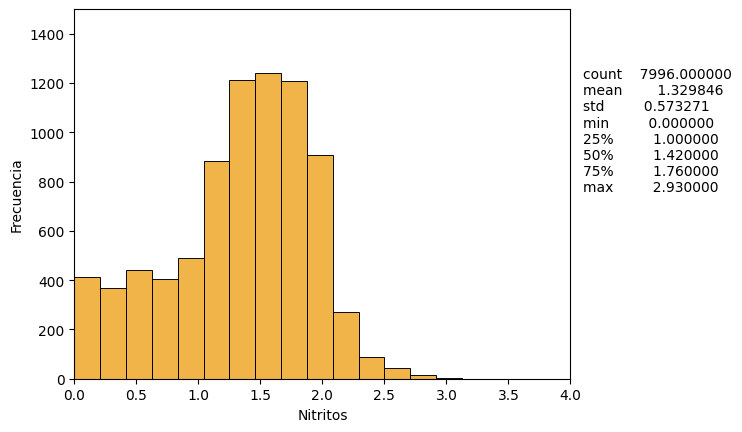

In [ ]:
sns.histplot(data = df, x = "nitrites", color="#ed9b0c", bins = "sturges", binrange= (0, 10))
plt.xlim(0, 4)
plt.ylim(0, 1500)
plt.ylabel("Frecuencia")
plt.figtext(0.92,0.5, df["nitrites"].describe().to_string())
plt.xlabel("Nitritos")
plt.show()

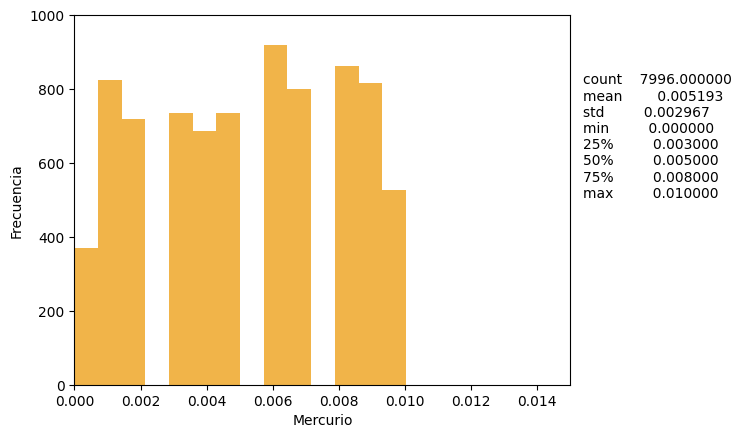

In [ ]:
sns.histplot(data = df, x = "mercury", color="#ed9b0c", bins = "sturges", binrange= (0, 10))
plt.xlim(0, 0.015)
plt.ylim(0, 1000)
plt.ylabel("Frecuencia")
plt.figtext(0.92,0.5, df["mercury"].describe().to_string())
plt.xlabel("Mercurio")
plt.show()

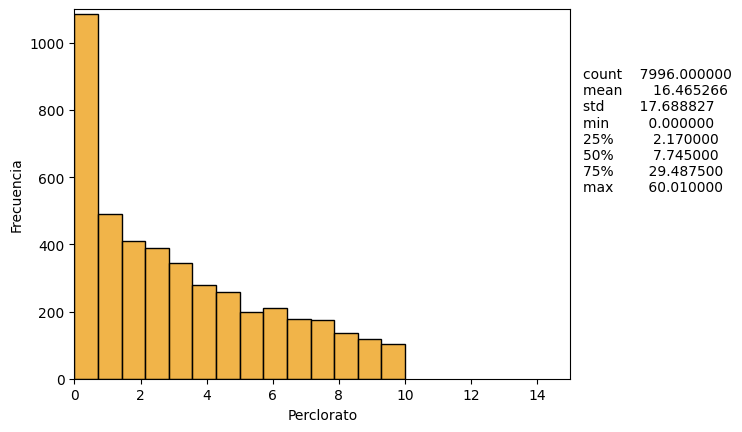

In [ ]:

sns.histplot(data = df, x = "perchlorate", color="#ed9b0c", bins = "sturges", binrange= (0, 10))
plt.xlim(0, 15)
plt.ylim(0, 1100)
plt.ylabel("Frecuencia")
plt.figtext(0.92,0.5, df["perchlorate"].describe().to_string())
plt.xlabel("Perclorato")
plt.show()

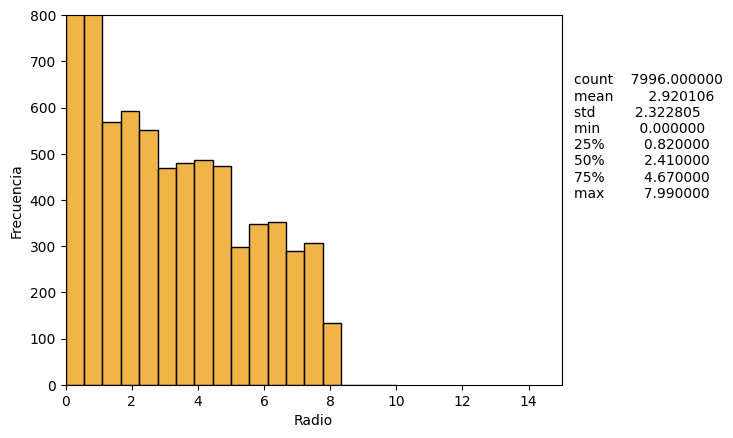

In [ ]:
sns.histplot(data = df, x = "radium", color="#ed9b0c", bins = "sturges", binrange= (0, 10))
plt.xlim(0, 15)
plt.ylim(0, 800)
plt.ylabel("Frecuencia")
plt.figtext(0.92,0.5, df["radium"].describe().to_string())
plt.xlabel("Radio")
plt.show()

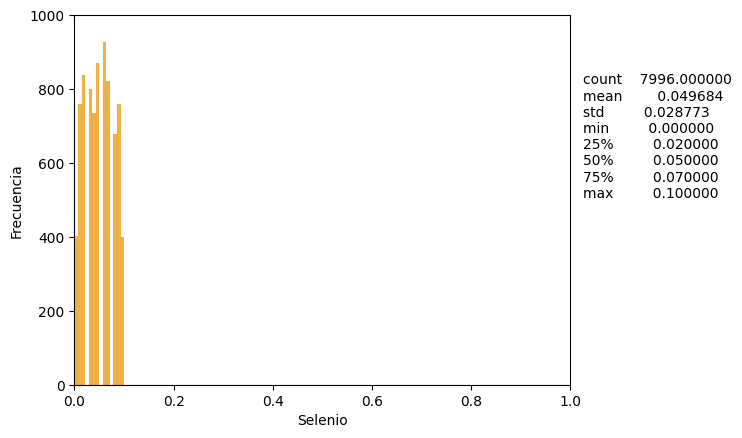

In [ ]:
sns.histplot(data = df, x = "selenium", color="#ed9b0c", bins = "sturges", binrange= (0, 10))
plt.xlim(0, 1)
plt.ylim(0, 1000)
plt.ylabel("Frecuencia")
plt.figtext(0.92,0.5, df["selenium"].describe().to_string())
plt.xlabel("Selenio")
plt.show()

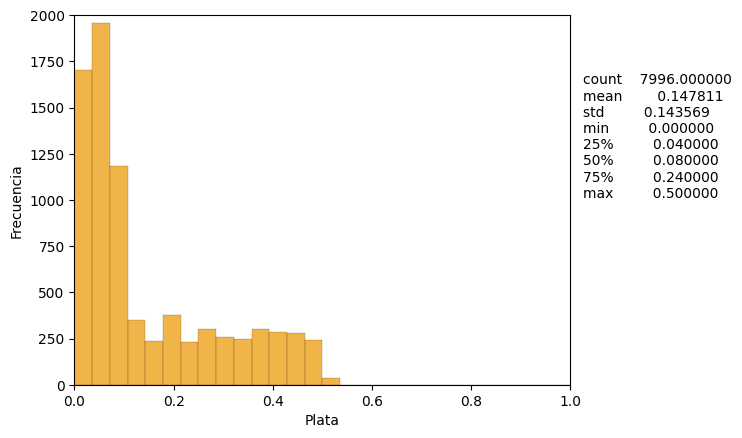

In [ ]:
sns.histplot(data = df, x = "silver", color="#ed9b0c", bins = "sturges", binrange= (0, 10))
plt.xlim(0, 1)
plt.ylim(0, 2000)
plt.ylabel("Frecuencia")
plt.figtext(0.92,0.5, df["silver"].describe().to_string())
plt.xlabel("Plata")
plt.show()

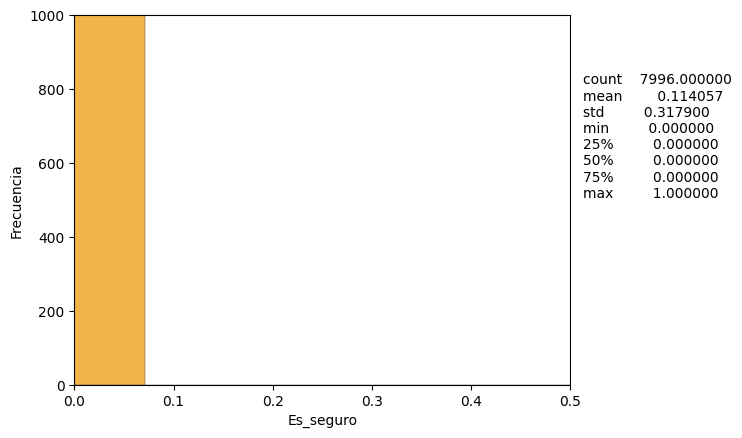

In [ ]:
sns.histplot(data = df, x = "is_safe", color="#ed9b0c", bins = "sturges", binrange= (0, 10))
plt.xlim(0, 0.5)
plt.ylim(0, 1000)
plt.ylabel("Frecuencia")
plt.figtext(0.92,0.5, df["is_safe"].describe().to_string())
plt.xlabel("Es_seguro")
plt.show()

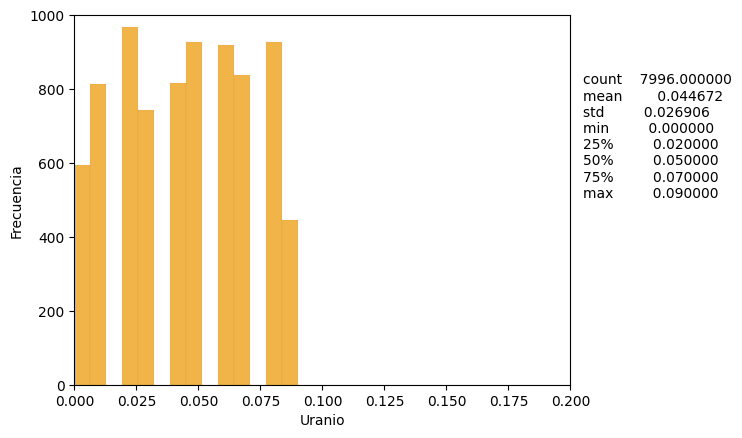

In [ ]:
sns.histplot(data = df, x = "uranium", color="#ed9b0c", bins = "sturges", binrange= (0, 10))
plt.xlim(0, 0.2)
plt.ylim(0, 1000)
plt.ylabel("Frecuencia")
plt.figtext(0.92,0.5, df["uranium"].describe().to_string())
plt.xlabel("Uranio")
plt.show()

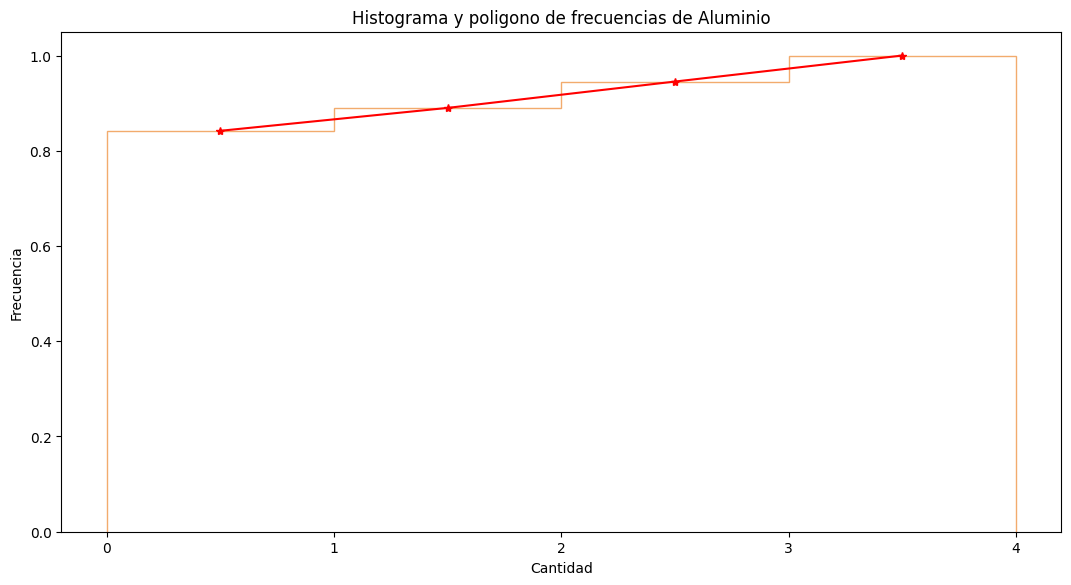

In [ ]:
intervalos = range(0,5,1) #indicamos los extremos de los intervalos
fig = plt.figure(figsize = (10,5))
ax = fig.add_axes([0,0,1,1])
y, edges, _ = ax.hist(x=df['aluminium'], bins=intervalos, color='#F2AB6D',histtype='step',cumulative=True, density = True)
#print(y)
#print(edges)
#print(type(edges))
midpoints = 0.5*(edges[1:]+edges[:-1])
#print(edges[1:])
#print(edges[:-1])
ax.plot(midpoints, y, 'r-*')
plt.title('Histograma y poligono de frecuencias de Aluminio')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.xticks(intervalos)

plt.show() #dibujamos el histograma

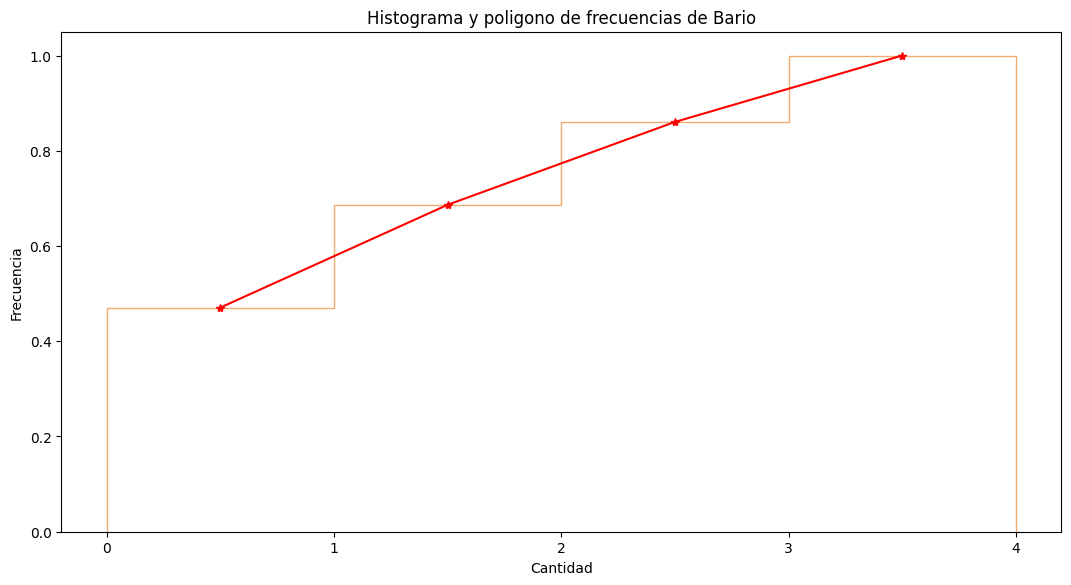

In [ ]:
intervalos = range(0,5,1) #indicamos los extremos de los intervalos
fig = plt.figure(figsize = (10,5))
ax = fig.add_axes([0,0,1,1])
y, edges, _ = ax.hist(x=df['barium'], bins=intervalos, color='#F2AB6D',histtype='step',cumulative=True, density = True)
#print(y)
#print(edges)
#print(type(edges))
midpoints = 0.5*(edges[1:]+edges[:-1])
#print(edges[1:])
#print(edges[:-1])
ax.plot(midpoints, y, 'r-*')
plt.title('Histograma y poligono de frecuencias de Bario')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.xticks(intervalos)

plt.show() #dibujamos el histograma

In [ ]:
mode = df.mode(numeric_only = False)
print(mode)

   aluminium  ammonia  arsenic  barium  cadmium  chloramine  chromium  copper  \
0       0.09     0.12     0.04    0.23     0.09        0.09      0.04    0.05   
1        NaN     0.17      NaN    0.38      NaN         NaN       NaN     NaN   
2        NaN     0.37      NaN     NaN      NaN         NaN       NaN     NaN   

   flouride  bacteria  ...   lead  nitrates  nitrites  mercury  perchlorate  \
0      1.43       0.0  ...  0.001      8.32       1.2    0.006         0.05   
1       NaN       NaN  ...    NaN       NaN       NaN      NaN          NaN   
2       NaN       NaN  ...    NaN       NaN       NaN      NaN          NaN   

   radium  selenium  silver  uranium  is_safe  
0    0.06      0.06    0.04     0.02      0.0  
1     NaN       NaN     NaN      NaN      NaN  
2     NaN       NaN     NaN      NaN      NaN  

[3 rows x 21 columns]


In [ ]:
import numpy as np

#define función para calcular coeficiente de variacion (cv)
cv = lambda x: np.std(x, ddof = 1 )/np.mean(x) * 100

#calcular CV para cada columna en el marco de datos
df.loc[:,['aluminium', 'ammonia','arsenic', 'barium','cadmium','chloramine', 'chromium','copper','flouride','bacteria','lead','nitrates','nitrites','mercury','perchlorate','radium','selenium','silver','uranium', 'is_safe']].apply(cv)

aluminium      189.875640
ammonia         62.185170
arsenic        156.451074
barium          77.569093
cadmium         84.220661
chloramine     117.892306
chromium       109.447463
copper          81.097142
flouride        56.427883
bacteria       103.059924
lead            58.501473
nitrates        56.439919
nitrites        43.108055
mercury         57.141768
perchlorate    107.431160
radium          79.545225
selenium        57.913156
silver          97.129645
uranium         60.229661
is_safe        278.720566
dtype: float64

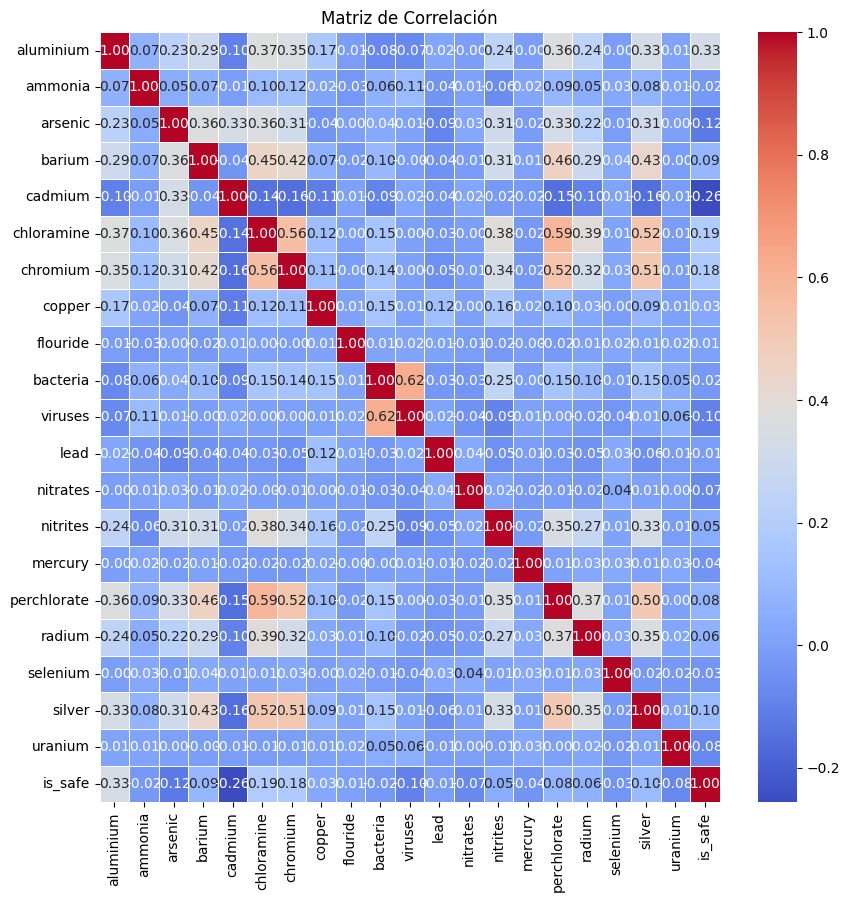

In [ ]:
correlation_matrix = df.corr()

# Crear el mapa de calor utilizando Seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
# Example of the Spearman's Rank Correlation Test
from scipy.stats import spearmanr
stat, p = spearmanr(df['is_safe'], df['uranium'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=-0.076, p=0.000
Probably dependent


In [ ]:
from scipy.stats import shapiro
stat, p = shapiro(df['uranium'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.944, p=0.000
Probably not Gaussian


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
#Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
stat, p = normaltest(df['viruses'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=40661.850, p=0.000
Probably not Gaussian


In [ ]:
# Example of the Mann-Whitney U Test
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(df['selenium'], df['uranium'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=35040086.500, p=0.000
Probably different distributions
